# __Titanic__ Project

## Introduction

The sinking of the RMS Titanic is one of the most famous maritime disasters in history. On the night of April 14, 1912, the Titanic struck an iceberg and sank in the cold waters of the North Atlantic, killing more than 1,500 of its 2,224 passengers and crew. This tragic event has been the subject of countless studies and investigations to better understand the circumstances and factors that influenced the survival of the passengers.

In this project, we will conduct a comprehensive analysis of the famous Titanic dataset, which contains information about the passengers on the ship. Our goal is to explore variables, create new features, discover hidden patterns, and build predictive models to determine what factors influenced passenger survival.

<img src=titanic-fact-file.jpg>


## Description of Variables

The Titanic dataset includes the following variables:

    PassengerId: Unique identifier of each passenger.
    Survived: Survival indicator (0 = Did not survive, 1 = Survived).
    Pclass: Passenger's ticket class (1 = First class, 2 = Second class, 3 = Third class).
    Name: Passenger's name.
    Sex: Passenger's sex.
    Age: Passenger's age.
    SibSp: Number of siblings and/or spouses on board Titanic.
    Parch: Number of parents and/or children on board the Titanic.
    Ticket: Passenger's ticket number.
    Fare: Fare paid for the ticket.
    Cabin: Passenger's cabin number.
    Embarked: Passenger's port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Objectives

- __Data Exploration__: Conduct an exploratory data analysis (EDA) to gain an initial understanding of the variables and their distribution.

- __Data Cleaning__: Identify and handle missing values, duplicates and outliers.

- __Feature Engineering__: Create new variables that can be useful for analysis and modeling.

- __Descriptive Analysis__: Investigate the relationship between variables and passenger survival.

- __Predictive Modeling__: Build and evaluate machine learning models to predict passenger survival.

- __Conclusions__: Draw conclusions and recommendations based on the results of the analysis.

## Methodology

1) `Data Loading and Visualization`: We will start by loading the dataset and performing an initial visualization to familiarize ourselves with its structure.

2) `Exploratory Data Analysis (EDA)`: We will explore the variables through descriptive statistics and graphical visualizations.

3) `Data Cleaning and Preparation`: We will address missing values, outliers and other anomalies.

4) `Feature Engineering`: We will create new variables from existing ones to improve the analysis.

5) `Predictive Modeling`: We will use machine learning algorithms such as Logistic Regression, Random Forest and Support Vector Machines (SVM) to predict survival.

6) `Model Evaluation`: We will evaluate the performance of the models using metrics such as accuracy, recall and ROC-AUC curve.

7) `Conclusions and Recommendations`: We will summarize the findings of the analysis and provide recommendations based on the results obtained.

## Conclusion

Through this project, we not only sought to better understand the factors that influenced the survival of the Titanic's passengers, but also to apply data analytics and machine learning techniques to extract valuable information from a historical dataset. 

`Let's begin this journey of discovery and learning!`

## 1) Data Loading and Visualization

First, we import the libraries needed for data analysis. We will use pandas for data manipulation and seaborn, matplotlib and plotly for visualization.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from scipy.stats import zscore


We load the Titanic dataset from a CSV file. We will use pandas to read the file and store the data in a DataFrame.

In [2]:
# Loading data

file = r'C:\Users\mar27\OneDrive\Documentos\CURSOS\DATA_ANALYTICS_UPGRADEHUB\1_MODULO\08_Proyecto-modulo\titanic.csv'

df = pd.read_csv(file)

Let's create a copy of the original dataset to work on it and not directly on the original one.

In [3]:
df_copy = df.copy()

To better understand the structure and content of the dataset, we will perform some initial visualizations and review the basic information of the variables.

We will display general DataFrame information, such as the data type of each column and the number of non-null values, to identify possible data quality problems.

In [4]:
df.head() # first view

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
columns = df.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We already can see there are some missing values in columns: age, cabin and embarked.

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

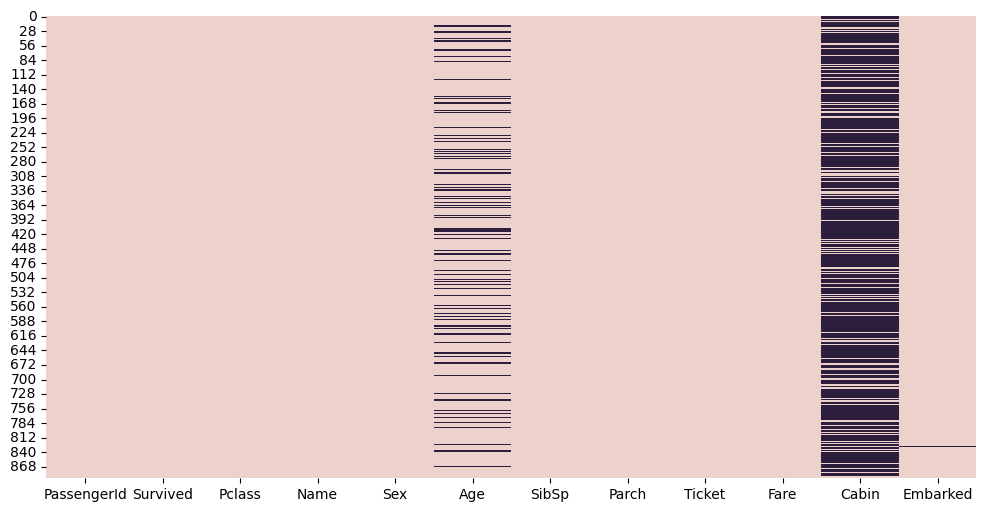

In [9]:
# Adjust figure size
plt.figure(figsize=(12, 6)) 

# Create hetmap
ax = sns.heatmap(df.isna(), cbar=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show();

We generate a statistical description of numerical variables to observe measures such as mean, standard deviation, minimum and maximum values, and percentiles.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


__Conclusion__:

    The initial loading and visualization of the data provides us with a preliminary understanding of the dataset. We can identify some key areas for further analysis, such as age distribution, the impact of sex and class on survival, and the need to address missing values in the Age, Cabin and Embarked variables. In the next sections, we will conduct a more detailed exploratory data analysis (EDA) and begin to prepare the data for predictive modeling.

## 2) Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial phase in any data analysis project. In this stage, we explore and visualize the data to discover patterns, detect anomalies, test hypotheses and verify assumptions with the help of descriptive statistics and graphical representations.

### 1 - Distribution of Categorical Variables

We visualize the distribution of some categorical variables such as Sex, Pclass, and Embarked to get an idea of the composition of the dataset.

We can get valuable information from the other categorical variables (Cabin, Ticket, and Name) doing some engineering features that we will carry out at a later stage.

#### Sex

In [11]:
# Some plots to visualize the sex variable

px.histogram(df['Sex'])

In [12]:
# Sex percentage

df_copy['Sex'].value_counts(normalize=True)*100

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

35% of the passengers were women and 75 % were men.

#### Pclass

In [13]:
px.histogram(df['Pclass'], color=df['Pclass'], color_discrete_sequence=['lightgreen', 'lightblue', 'pink'])

In [14]:
# Pclass percentage

df_copy['Pclass'].value_counts(normalize=True)*100

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

55% of the passengers belonged to third class, 24%  belonged to second class and 21%  belonged to first class.

<Axes: xlabel='Pclass', ylabel='Survived'>

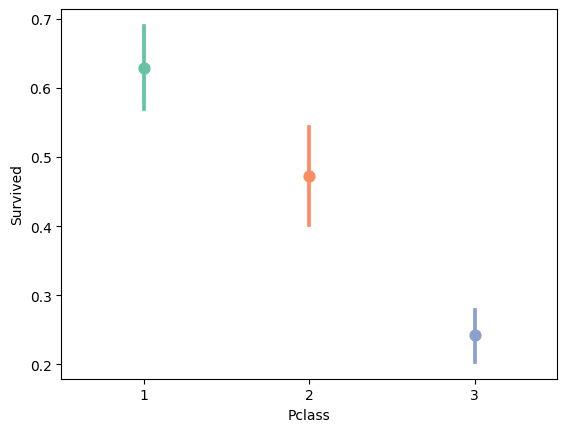

In [155]:
sns.pointplot(x='Pclass', y='Survived', data=df_copy, palette='Set2', legend=False, hue='Pclass')

#### Embarked

In [15]:
fig = px.histogram(df['Embarked'], color=df['Embarked'], color_discrete_sequence=['lightgreen', 'lightblue', 'pink'])
fig.update_xaxes(tickvals=['S', 'C', 'Q'], ticktext=['Southampton ', 'Cherbourg', 'Queenstown'])
fig.for_each_trace(lambda trace: trace.update(name='Southampton' if trace.name == 'S' 
                                                  else 'Cherbourg' if trace.name == 'C' 
                                                  else 'Queenstown' if trace.name == 'Q' else trace.name))

fig.show();

In [16]:
# Embarked percentage

df_copy['Embarked'].value_counts(normalize=True)*100

Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64

72% of passengers embarked in Southampton, 19% of passengers boarded in Cherbourg and 9% of passengers boarded in Queenstown.

<img src=route.jpg>


#### Some relationship between them

##### Pclass vs. Embarked

In [17]:
fig = px.histogram(df['Pclass'], color=df['Embarked'], color_discrete_sequence=['lightgreen', 'lightblue', 'pink'])
fig.for_each_trace(lambda trace: trace.update(name='Southampton' if trace.name == 'S' 
                                                  else 'Cherbourg' if trace.name == 'C' 
                                                  else 'Queenstown' if trace.name == 'Q' else trace.name))

fig.show();

The vast majority of first and second class passengers embarked at Southampton or Cherbourg. Most of those who embarked at Queenstown were third class.

##### Embarked vs. Pclass

In [18]:
fig = px.histogram(df['Embarked'], color=df['Pclass'], color_discrete_sequence=['lightgreen', 'lightblue', 'pink'])
fig.update_xaxes(tickvals=['S', 'C', 'Q'], ticktext=['Southampton ', 'Cherbourg', 'Queenstown'])
fig.show();

##### Pclass vs. Sex

In [19]:
px.histogram(df['Pclass'], color=df['Sex'], color_discrete_sequence=['lightblue', 'pink'])

In [20]:
# Percentage of males from 3 class

df_copy[(df_copy['Pclass'] == 3) & (df_copy['Sex'] == 'male')].shape[0] / df_copy[df_copy['Pclass'] == 3].shape[0] * 100

70.67209775967413

70% of third class passengers were male.

##### Embarked vs. Sex

In [21]:
fig = px.histogram(df['Embarked'], color=df['Sex'], color_discrete_sequence=['lightblue', 'pink'])
fig.update_xaxes(tickvals=['S', 'C', 'Q'], ticktext=['Southampton ', 'Cherbourg', 'Queenstown'])
fig.show();

### 2 - Distribution of Numerical Variables

We analyze the distributions of numerical variables such as Age, Fare, SibSp and Parch.

#### Age

In [22]:
px.histogram(df['Age'], marginal='box')

Age ranges from infants to elderly passengers. We can see some outliers.

#### Fare

In [23]:
px.histogram(df['Fare'], marginal='box')

Wide range of fare prices. We can see some outliers from above.

#### SibSp

In [24]:
px.histogram(df['SibSp'], marginal='box')

Most of them were alone.

#### Parch

In [25]:
px.histogram(df['Parch'], marginal='box')

#### Survived (targed variable)

We visualized the distribution of the Survived target variable to understand the proportion of passengers who survived and those who did not.

In [26]:
# Plot the histogram
fig = px.histogram(df, x='Survived', color='Survived', color_discrete_sequence=['pink', 'lightgreen'])

# Update x-axis labels
fig.update_xaxes(tickvals=[0, 1], ticktext=['Not Survived', 'Survived'])

# Update legend labels
fig.for_each_trace(lambda trace: trace.update(name = 'Survived' if trace.name == '1' else 'Not Survived'))

# Show the plot
fig.show()

In [27]:
# Percentage of survived

df_copy['Survived'].value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

The overall survival rate on the Titanic was quite low, indicating a high mortality rate. This raises questions about what factors influenced survival.

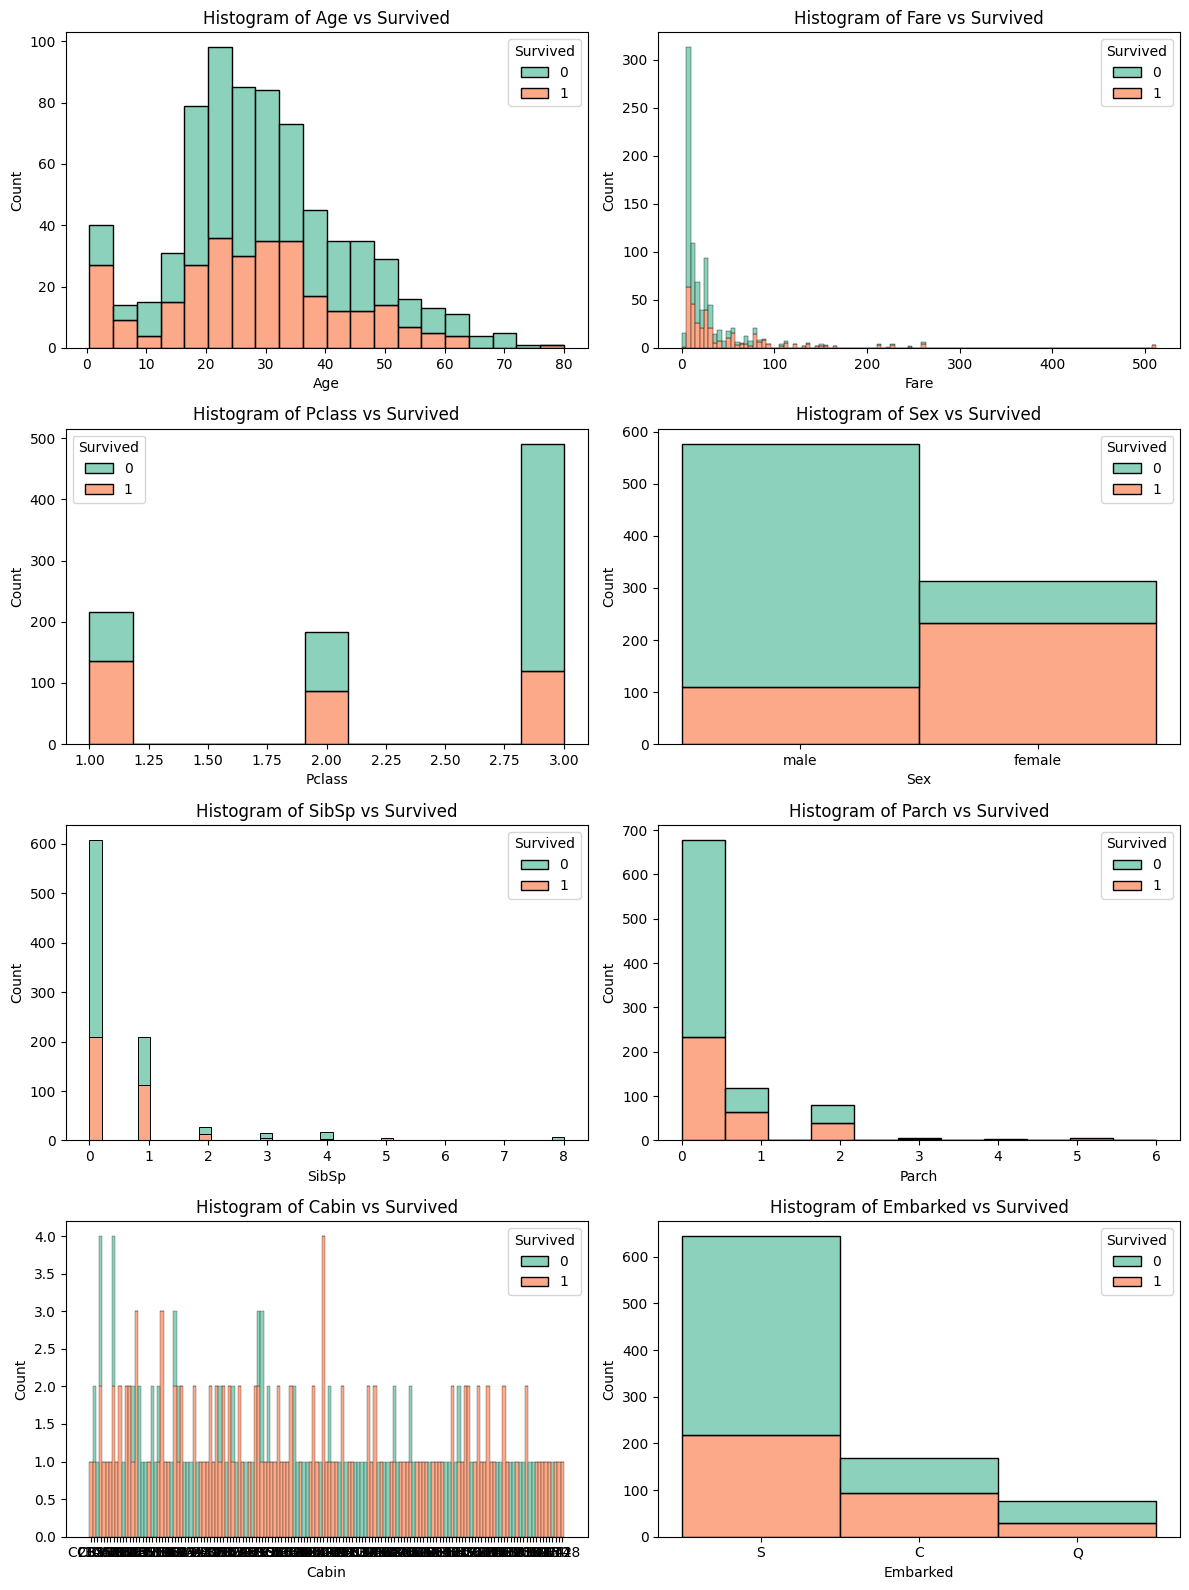

In [122]:
# Plotting all variables together

# Plotting an histogram to see how different independent variables influences the dependent variable (survived)
independent_variables = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']

# Calculate the number of rows needed for the grid
num_rows = len(independent_variables) // 2
if len(independent_variables) % 2: num_rows += 1

# Create the grid
plt.figure(figsize=(12, 4 * num_rows))
for i, var in enumerate(independent_variables):
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(data=df, x=var, hue='Survived', multiple="stack", palette='Set2')
    plt.title(f'Histogram of {var} vs Survived')

plt.tight_layout()
plt.show()

### 3 - Relationship between Variables

We investigated the relationship between the independent variables and the target variable Survived.

##### Survived vs. Sex

In [28]:
fig = px.histogram(df, x='Survived', color='Sex', color_discrete_sequence=['lightblue', 'pink'])

fig.update_xaxes(tickvals=[0, 1], ticktext=['Not Survived', 'Survived'])

fig.show()

In [29]:
# Percentage of survivors by sex

df.groupby('Sex')['Survived'].mean() * 100


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

There was a clear gender disparity in survival rates, with females having a significantly higher survival rate (74%) compared to males (19%). This likely reflects the "women and children first" protocol that was followed during the disaster.

##### Survived vs. Pclass

In [30]:
fig = px.histogram(df, x='Survived', color='Pclass', color_discrete_sequence=['lightblue', 'pink', 'lightgreen'])

fig.update_xaxes(tickvals=[0, 1], ticktext=['Not Survived', 'Survived'])

fig.show()

In [31]:
# Percentage of survivors by class

df.groupby('Pclass')['Survived'].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

The majority of passengers were in 3rd class. There is a noticeable disparity in survival rates across classes, with 1st class having the highest survival rates and 3rd class the lowest. This suggests that socio-economic status had a significant impact on survival chances.

##### Survived vs. Embarked

In [32]:
fig = px.histogram(df, x='Survived', color='Embarked', color_discrete_sequence=['lightblue', 'pink', 'lightgreen'])

fig.update_xaxes(tickvals=[0, 1], ticktext=['Not Survived', 'Survived'])
fig.for_each_trace(lambda trace: trace.update(name='Southampton' if trace.name == 'S' 
                                                  else 'Cherbourg' if trace.name == 'C' 
                                                  else 'Queenstown' if trace.name == 'Q' else trace.name))
fig.show()

In [33]:
# Percentage of survivors by port of embarkation

df.groupby('Embarked')['Survived'].mean() * 100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

Passengers who embarked from Cherbourg had higher survival rates compared to those from Southampton and Queenstown. This could be attributed to the socio-economic status of these passengers, as those embarking at Cherbourg were more likely to be in 1st class.

##### Embarked vs. Survived

In [34]:
fig = px.histogram(df, x='Embarked', color='Survived', color_discrete_sequence=['pink', 'lightgreen'])

fig.for_each_trace(lambda trace: trace.update(name = 'Survived' if trace.name == '1' else 'Not Survived'))
fig.update_xaxes(tickvals=['S', 'C', 'Q'], ticktext=['Southampton ', 'Cherbourg', 'Queenstown'])

fig.show()

##### SibSp vs. Survived

In [35]:
fig = px.histogram(df, x='SibSp', color='Survived', color_discrete_sequence=['pink', 'lightgreen'])

fig.for_each_trace(lambda trace: trace.update(name = 'Survived' if trace.name == '1' else 'Not Survived'))

fig.show()

In [36]:
# Percentage of survivors by SibSp

df.groupby('SibSp')['Survived'].mean() * 100

SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64

Passengers with 1-2 siblings/spouses aboard had slightly higher survival rates. This could be because small family groups were more manageable during the chaos of the evacuation, whereas larger groups may have struggled to stay together.

##### Parch vs. Survived

In [37]:
fig = px.histogram(df, x='Parch', color='Survived', color_discrete_sequence=['pink', 'lightgreen'])

fig.for_each_trace(lambda trace: trace.update(name = 'Survived' if trace.name == '1' else 'Not Survived'))

fig.show()

In [38]:
# Percentage of survivors by Parch

df.groupby('Parch')['Survived'].mean() * 100

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64

Similar to SibSp, passengers with 1-2 parents/children aboard had higher survival rates. This might reflect the prioritization of families with children during the evacuation process.

##### Age vs. Survived

In [39]:
fig = px.histogram(df, x='Age', color='Survived', marginal='box', color_discrete_sequence=['pink', 'lightgreen'])

fig.for_each_trace(lambda trace: trace.update(name = 'Survived' if trace.name == '1' else 'Not Survived'))

fig.show()

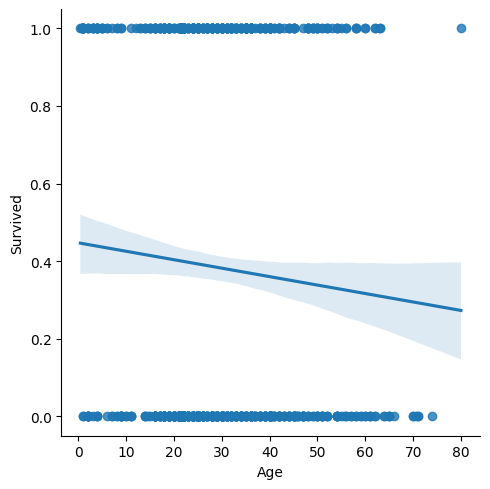

In [160]:
sns.lmplot(x='Age', y='Survived', data=df_copy, palette='Set2')


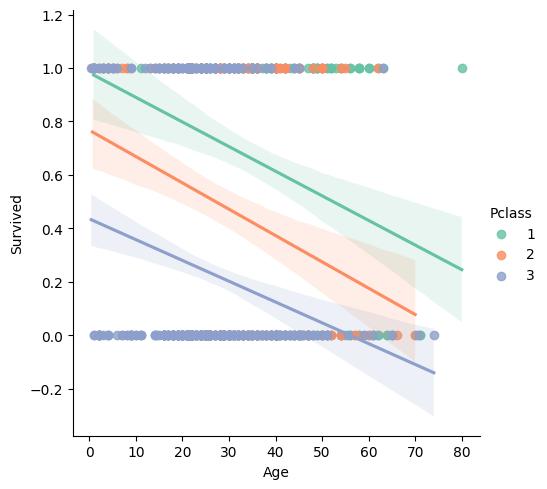

In [158]:
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=df_copy, palette='Set2')

Younger passengers, particularly children, had higher survival rates. This suggests that children were prioritized during the evacuation. Conversely, elderly passengers had lower survival rates, indicating they may have faced more challenges during the evacuation process.

##### Survived vs. Age

In [40]:
fig = px.violin(df, x='Survived', y='Age', color='Survived', box=True, points='all', color_discrete_sequence=['pink', 'lightgreen'])

fig.for_each_trace(lambda trace: trace.update(name = 'Survived' if trace.name == '1' else 'Not Survived'))
fig.update_xaxes(tickvals=[0, 1], ticktext=['Not Survived', 'Survived'])

fig.show()

### 4 - Correlation between Numerical Variables

We calculate and visualize the correlation matrix to better understand the relationships between numerical variables.

In [41]:
df.select_dtypes(include='number').corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [42]:
px.imshow(df.select_dtypes(include='number').corr(), color_continuous_scale='Magma_r')

- __Survived vs. Pclass__:

    Correlation: -0.338

    Insight: There's a moderate negative correlation, indicating that higher-class passengers (lower Pclass values) were more likely to survive. This suggests that socio-economic status had a significant impact on survival chances, with first-class passengers having better access to lifeboats and evacuation procedures.


- __Survived vs. Age__:

    Correlation: -0.077

    Insight: The weak negative correlation indicates that younger passengers had slightly higher survival rates. This is consistent with the prioritization of children during the evacuation.

- __Survived vs. SibSp__:

    Correlation: -0.035

    Insight: The very weak negative correlation suggests that having more siblings/spouses aboard did not significantly affect survival chances.

- __Survived vs. Parch__:

    Correlation: 0.081

    Insight: There's a very weak positive correlation, suggesting that passengers with more parents/children aboard had slightly better survival rates. Families with children might have been given some priority during the evacuation.

- __Survived vs. Fare__:

    Correlation: 0.257

    Insight: A moderate positive correlation indicates that passengers who paid higher fares (typically wealthier passengers) had better survival chances. This can be attributed to their likely residence in first-class cabins with better access to lifeboats.

- __Pclass vs. Fare__:

    Correlation: -0.552

    Insight: This strong negative correlation is expected since higher-class tickets (1st class) were more expensive than lower-class tickets (3rd class). It confirms that fare is a good proxy for passenger class.

- __Age vs. Parch__:

    Correlation: -0.189

    Insight: The weak negative correlation indicates that younger passengers were more likely to be traveling with parents/children. This reflects typical family structures, where younger children often travel with parents.

- __Age vs. SibSp__:

    Correlation: -0.240

    Insight: The weak negative correlation suggests that younger passengers were more likely to travel with siblings. This is consistent with family travel patterns.

- __Fare vs. SibSp and Parch__:

    Correlation: 0.159 (Fare vs. SibSp), 0.216 (Fare vs. Parch)

    Insight: These weak positive correlations suggest that passengers with higher fares were slightly more likely to travel with siblings/spouses or parents/children, possibly indicating family groups traveling together in higher classes.


    The findings emphasize the impact of socio-economic status, gender, and age on survival, which are critical considerations for further analysis and model building.

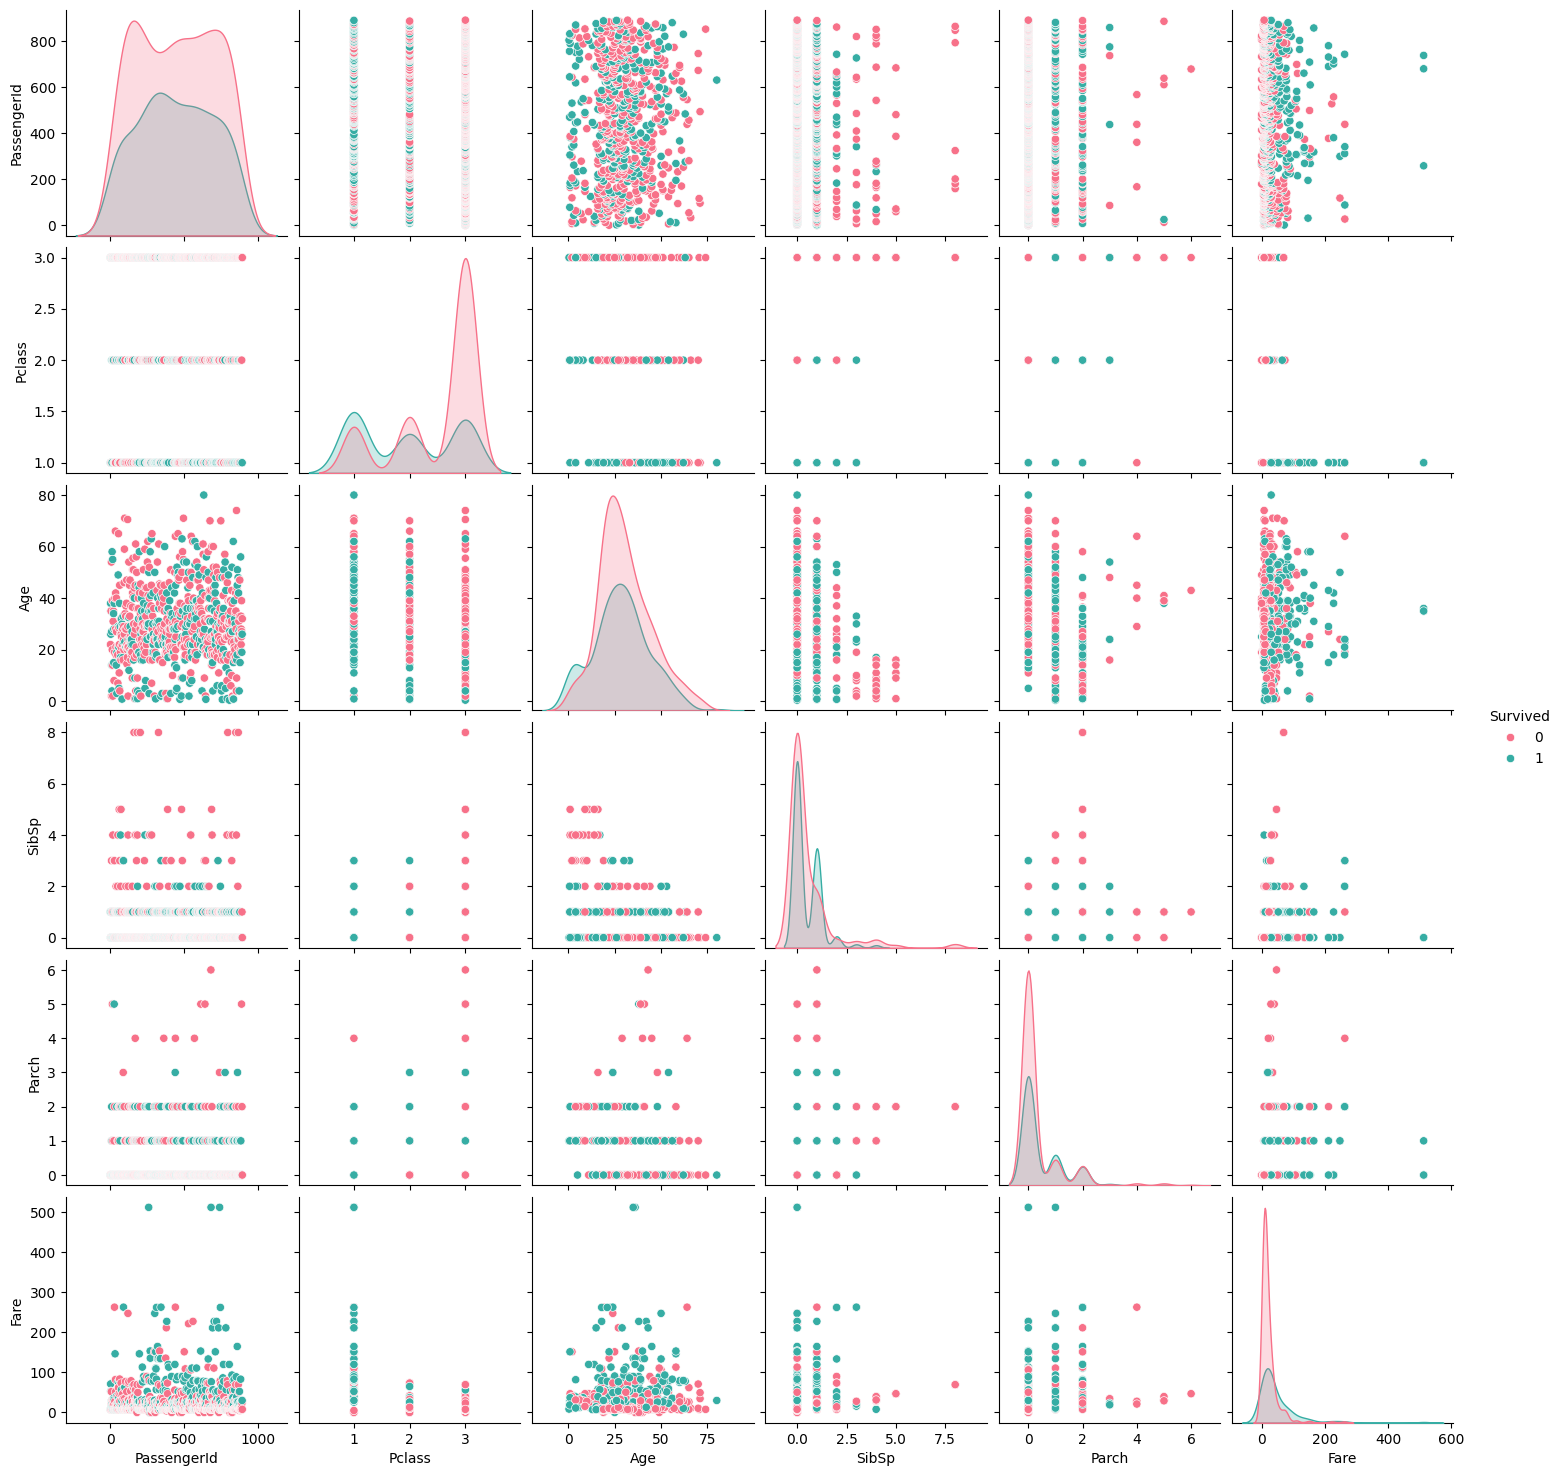

In [43]:
sns.pairplot(df, hue='Survived', palette='husl')

### 5 - Missing Values

We analyze missing values in the dataset and consider strategies to handle them.

In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

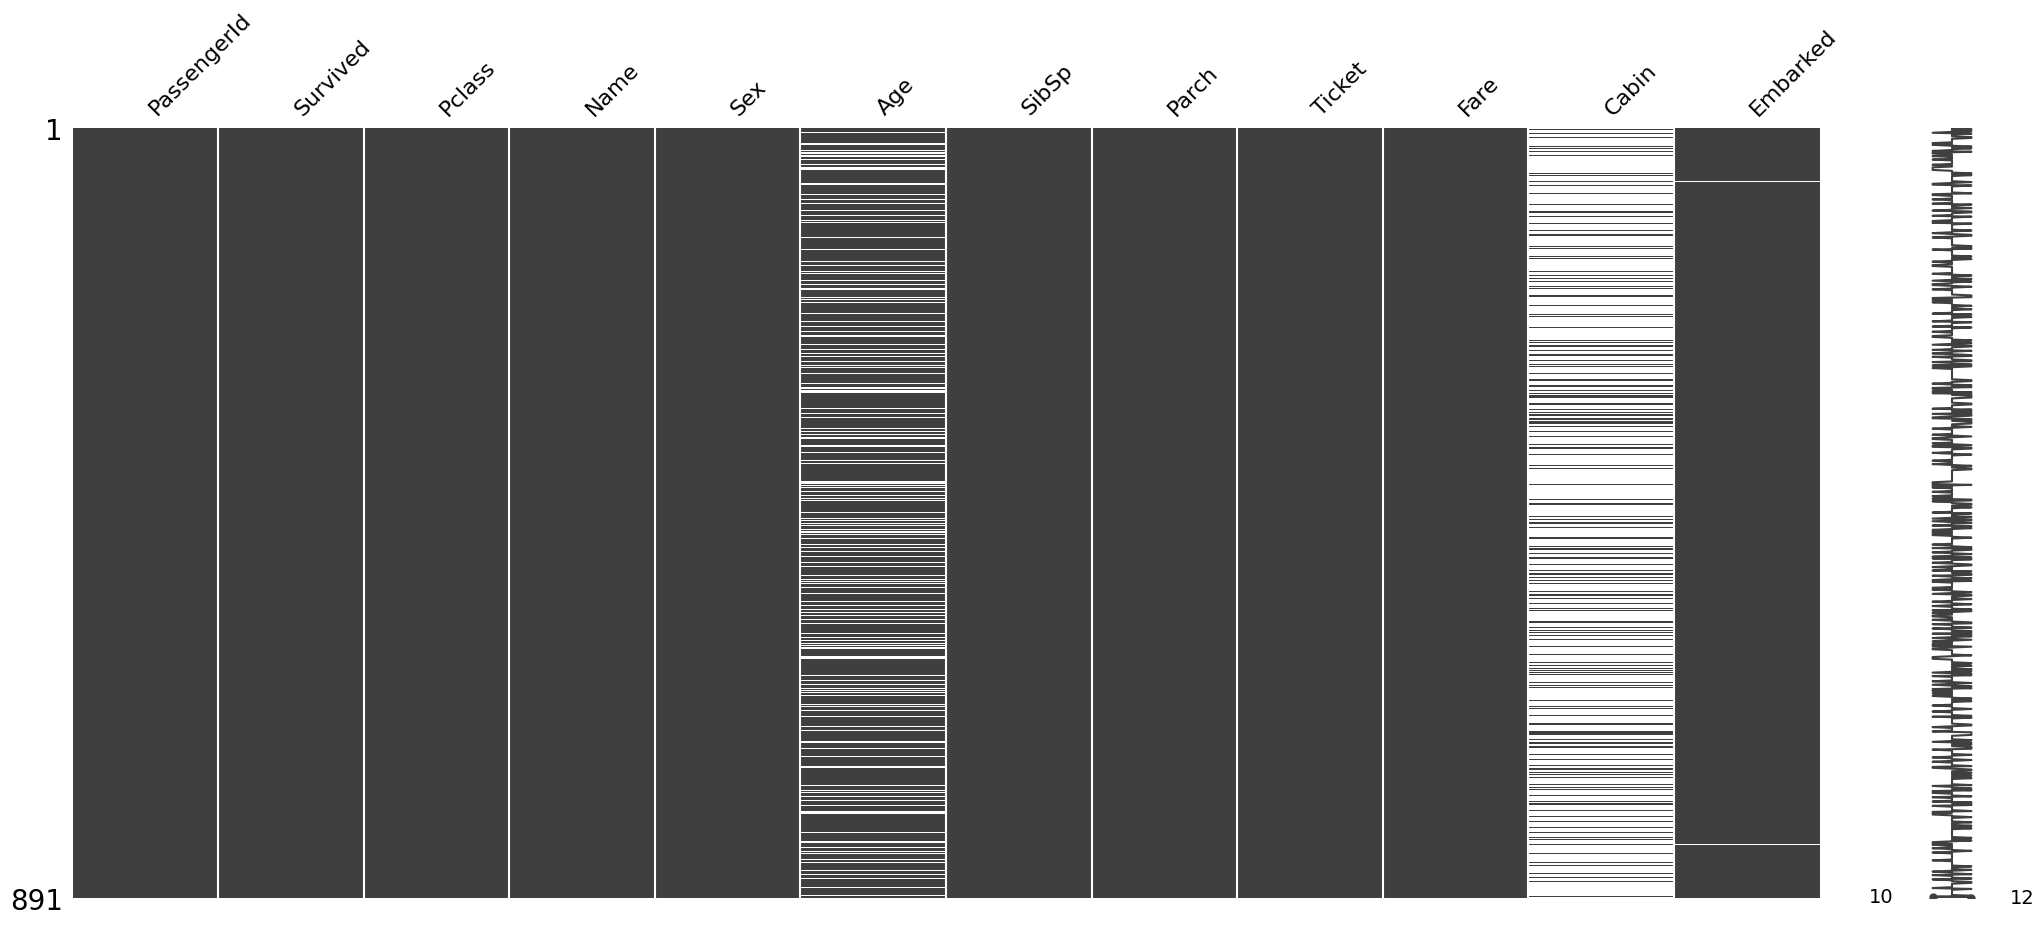

In [45]:
msno.matrix(df)

### Conclusion

Exploratory data analysis provides us with in-depth insight into the distributions of the variables and their relationships with the target variable Survived. We have identified key patterns, such as the influence of ticket class, gender, and age on survival. In addition, we have detected missing values in several columns, which will require specific imputation strategies. In the next phase, we will address data cleaning and preparation for predictive modeling.

## 3) Data Cleaning and Preparation

In this section, we will focus on cleaning and preparing the data for modeling. This includes addressing missing values, identifying and handling outliers, and correcting other possible anomalies in the dataset.

### 1 - Handling Missing Values

#### Identifying columns with missing values

We just saw there are three different columns with missing values: Cabin, Age and Embarked.

In [46]:
# Missing values percentage in each column

missing_values = df_copy.isnull().mean() * 100
missing_values.sort_values(ascending=False)[:3]

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

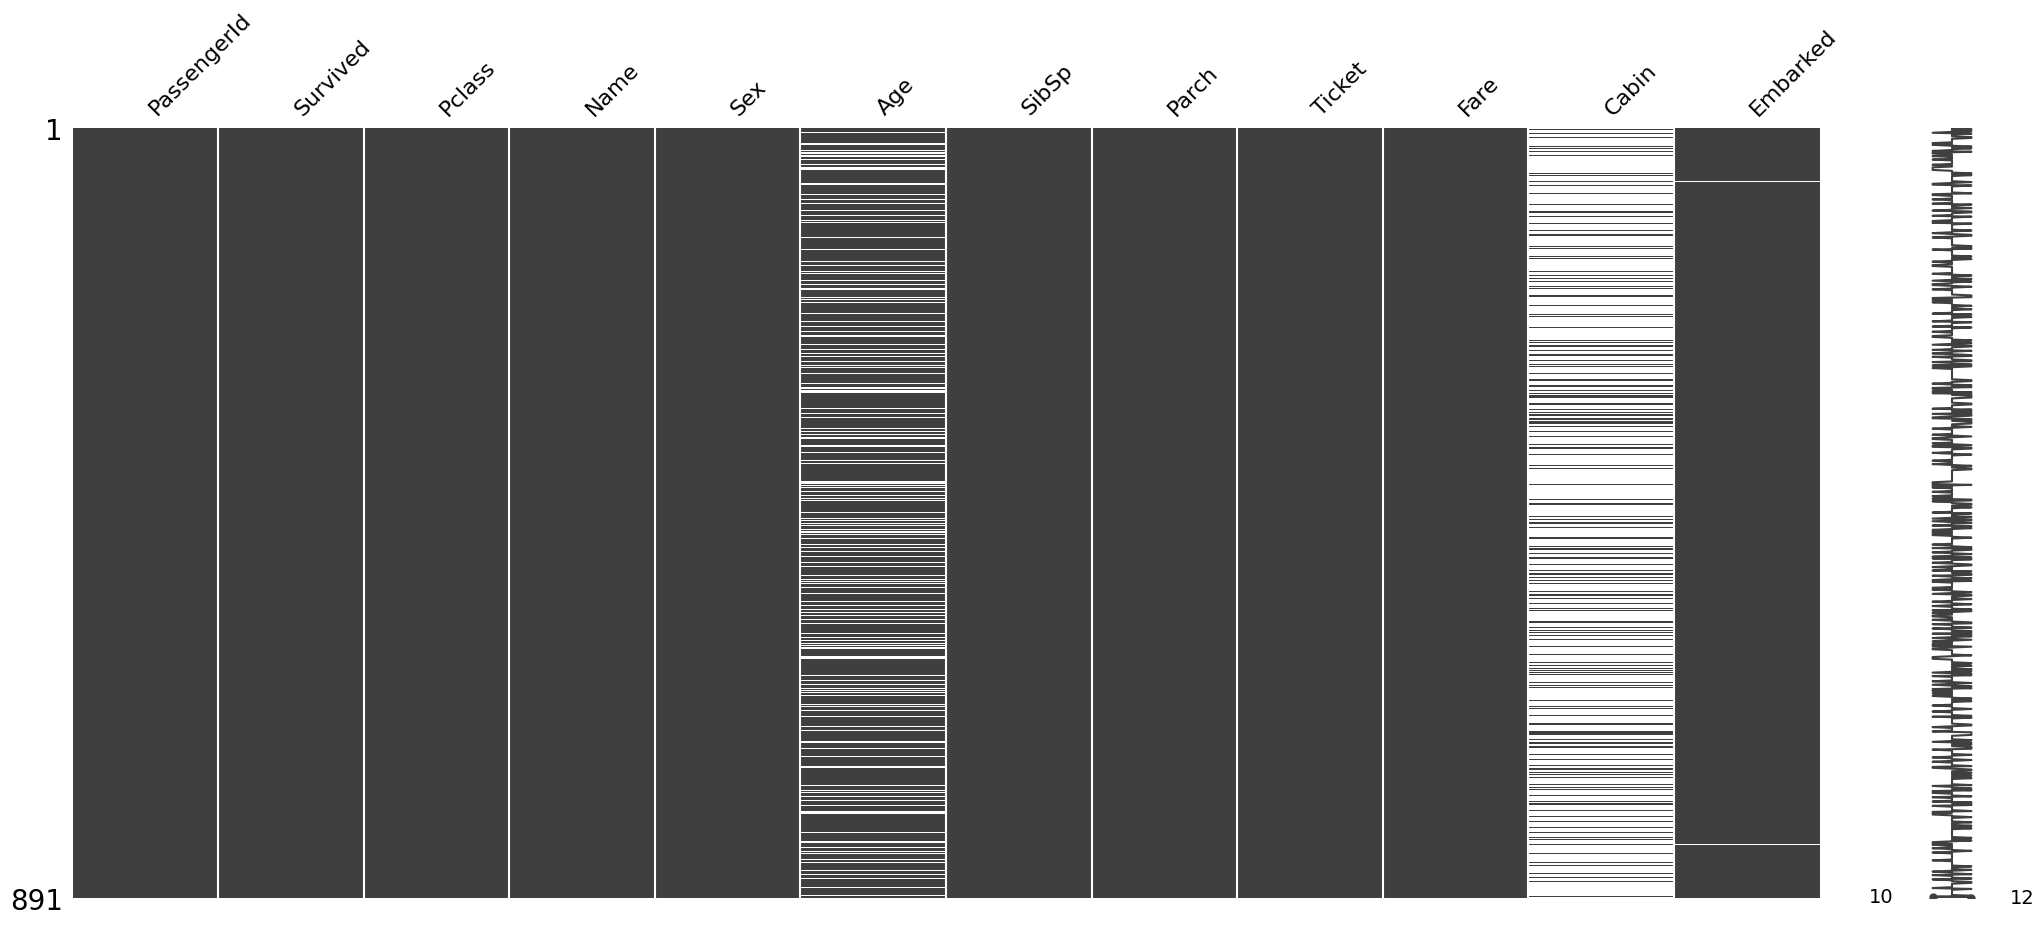

In [47]:
msno.matrix(df_copy);

Let's determine the best way to handle each column.

#### Cabin

Since 77% of this variable is missing data, and the way it is right now it doesn't provide us with information we can use, let's replace the missing values with U for Unknown.

In [48]:
df_copy['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [49]:
df_copy['Cabin'] = df_copy['Cabin'].fillna('U')

In [50]:
df_copy['Cabin'].isnull().sum()

0

#### Age

We discovered that the Age variable was missing 177 values, which accounts for approximately 19% of the dataset. Simply replacing these missing values with the mean or median age might not be the most effective solution, as ages can vary significantly across different groups and categories of passengers.

To gain a better understanding, we'll group our dataset by sex and passenger class. For each subset, we'll calculate the median age.

In [51]:
df_copy['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [52]:
median_bygroup = df_copy.groupby(['Sex', 'Pclass'])['Age'].median()
median_bygroup = median_bygroup.reset_index()
median_bygroup

,Sex,Pclass,Age
0,female,1,35.0
1,female,2,28.0
2,female,3,21.5
3,male,1,40.0
4,male,2,30.0
5,male,3,25.0


For instance: 

If the passenger is female and from Pclass 1 the median age is 35.0. If the passenger is female and from Pclass 2 the median age is 28. We'll create a function that fills in the missing age in the dataset based on these attributes. This function will use the median age values calculated.

In [53]:
def fill_age(row):
    condition = (
        (median_bygroup['Sex'] == row['Sex']) &
        (median_bygroup['Pclass'] == row['Pclass'])
    )
    return median_bygroup[condition]['Age'].values[0]

def process_age(df):
    df['Age'] = df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return df

df_copy = process_age(df_copy)

In [54]:
df_copy['Age'].isna().sum()

0

Let's explore how the age distribution varies across different classes. We'll employ Seaborn's FacetGrid for this task.

_(FacetGrid is a feature in the seaborn (sns) Python library that allows you to create a grid of subplots based on the unique values of one or more categorical variables. It's particularly useful for visualizing relationships between variables across different subsets of the data.)_

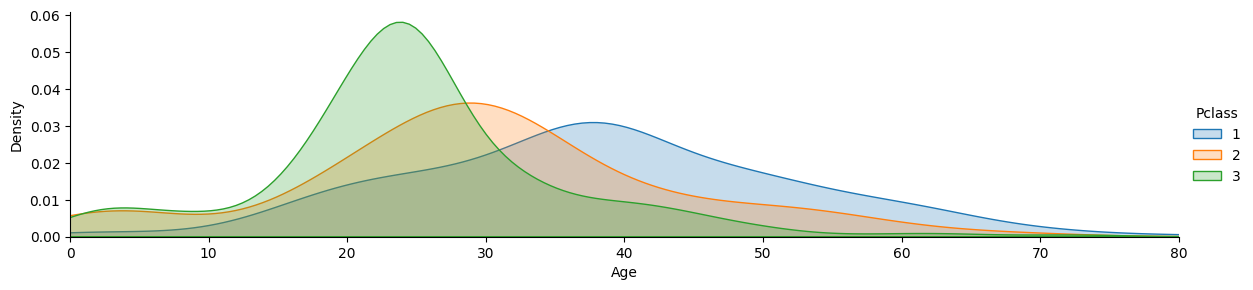

In [138]:
# Create a FacetGrid object. 'hue' parameter colors the plot elements by 'Pclass'. 'aspect' parameter controls the width of each facet.
fig = sns.FacetGrid(df_copy, hue='Pclass', aspect=4)

# Map a kernel density estimate plot to the FacetGrid. 'Age' is plotted on the x-axis. 'shade' parameter fills the area under the KDE curve.
fig.map(sns.kdeplot,'Age', fill=True)

# Get the maximum age in the 'Age' column
oldest = df_copy['Age'].max()

# Set the x-axis limit from 0 to the maximum age
fig.set(xlim = (0, oldest))

# Add a legend to the plot
fig.add_legend()

It's evident that first-class passengers were predominantly from middle-age groups, with minimal representation of children. On the other hand, second and third-class passengers comprised more children, with a comparatively smaller proportion of older individuals.

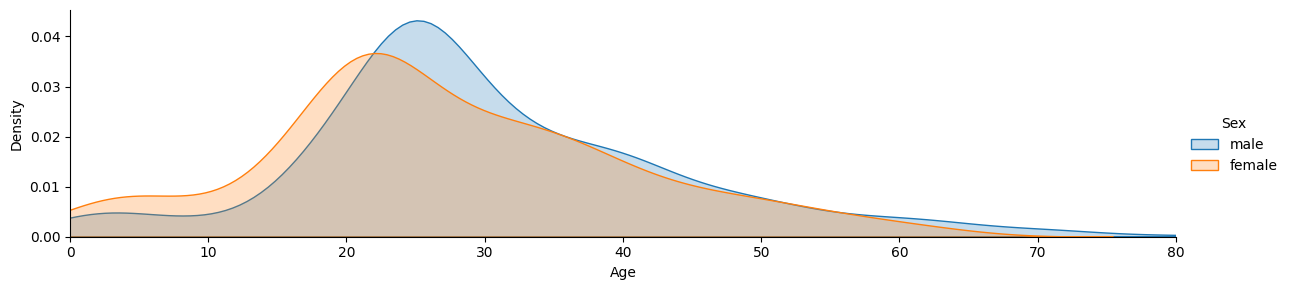

In [139]:
fig = sns.FacetGrid(df_copy, hue = 'Sex', aspect=4)

fig.map(sns.kdeplot,'Age', fill=True)

oldest = df_copy['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

The age distribution appears to be less diverse when considering male and female passengers. However, it's notable that there are more younger females than younger males.

#### Embarked

As we just have 2 missing values, we impute the missing values with the mode (most frequent value).

In [55]:
df_copy['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [56]:
df_copy['Embarked'].mode()[0]

'S'

In [57]:
df_copy['Embarked'] = df_copy['Embarked'].fillna(df_copy['Embarked'].mode()[0])

In [58]:
df_copy['Embarked'].isna().sum()

0

### 2 - Handling Outliers

Handling outliers is essential to improve the quality of our data and the accuracy of predictive models. 

In [59]:
# Getting the numerical columns

numerical_columns = df_copy.select_dtypes(include='number').columns 
numerical_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [60]:
# Excluding PassengerId, Survived and Pclass columns

numerical_columns = numerical_columns[3:] 
numerical_columns

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

To ensure the integrity of the original dataset, we will first create copies of the data on which we will perform the outlier analysis and visualizations. This will allow us to compare the results and keep a clear record of the modifications.

In [61]:
df_iqr = df_copy.copy()
df_zscore = df_copy.copy()

We will specifically address how to handle outliers in the Age, SibSp, Parch and Fare variables.

we will use two statistical methods to identify outliers in our dataset: the Interquartile Range (IQR) and the Z-score. These methods help us detect and understand extreme values in our data, which could be due to variability in the data or errors.

In [62]:
# Function to identify outliers using the IQR method

def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Function to identify outliers using the Z-score method

def identify_outliers_zscore(df, column, threshold=3):
    df_no_na = df.dropna(subset=[column])
    z_scores = zscore(df_no_na[column])
    abs_z_scores = np.abs(z_scores)
    outliers = df_no_na[abs_z_scores > threshold]
    return outliers


In [63]:
# Function to plot outliers

def plot_outliers(outliers_df, variable, categorical_vars):
    for cat_var in categorical_vars:
        # Box plot de variable vs. cat_var
        fig = px.box(outliers_df, x=cat_var, y=variable, points='all')
        fig.update_layout(title=f'{variable} outliers vs. {cat_var}')
        fig.show()

        # Histograma de variable coloreado por cat_var
        fig = px.histogram(outliers_df, x=variable, marginal='box', color=cat_var, color_discrete_sequence=px.colors.qualitative.Pastel)
        fig.update_layout(title=f'{variable} outliers histogram colored by {cat_var}')
        fig.show()

categorical_vars = ['Survived', 'Pclass', 'Sex']

In [64]:
def handle_outliers_and_plot(df, column, method='iqr'):
    """
    Replaces the outliers of a given column with the value of the upper/lower limit and displays a boxplot.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The name of the column to be processed.
    method (str): The method to calculate the limits ('iqr' or 'zscore').

    """
    if method == 'iqr':
        # Calculate upper and lower limits using IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    elif method == 'zscore':
        # Calculate upper and lower limits using Z-Score
        mean_col = df[column].mean()
        std_col = df[column].std()
        lower_bound = mean_col - 3 * std_col
        upper_bound = mean_col + 3 * std_col
    else:
        raise ValueError("Method must be 'iqr' or 'zscore'")
    
    # Replace the outliers with the upper or lower limit.
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    
    # Statistical description after treatment
    print(f'Statistical description of {column} after treatment:')
    print(df[column].describe())
    
    # Display the boxplot after treatment
    fig = px.box(df, x=column, points='all', title=f'{column} After Outlier Treatment')
    fig.show()


#### Age

First, we use boxplot to visually identify outliers in the variable.

In [65]:
px.box(df, x='Age', points='all')

Outliers in Age can be extremely young or very old people. We check the plausibility of these data and decide whether they should be treated as outliers or whether they are important real cases.

In [66]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [67]:
outliers_age_iqr = identify_outliers_iqr(df_iqr, 'Age')
outliers_age_iqr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,U,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,U,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,U,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,U,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S


In [68]:
outliers_age_zscore = identify_outliers_zscore(df_zscore, 'Age')
outliers_age_zscore

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,U,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,U,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,U,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,U,S


In [69]:
plot_outliers(outliers_age_iqr, 'Age', categorical_vars)

In [70]:
plot_outliers(outliers_age_zscore, 'Age', categorical_vars)

In [71]:
handle_outliers_and_plot(df_iqr, 'Age', method='iqr')

Statistical description of Age after treatment:
count    891.000000
mean      28.893850
std       12.732352
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       57.750000
Name: Age, dtype: float64


In [72]:
handle_outliers_and_plot(df_zscore, 'Age', method='zscore')

Statistical description of Age after treatment:
count    891.000000
mean      29.086251
std       13.218885
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       69.025696
Name: Age, dtype: float64


In [73]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### SibSp

In [74]:
px.box(df, x='SibSp', points='all')

In [75]:
# Statistical summary of the 'SibSp' column

df['SibSp'].describe()


count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [76]:
outliers_sibsp_iqr = identify_outliers_iqr(df_iqr, 'SibSp')
outliers_sibsp_iqr


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,U,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,U,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,U,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,U,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,U,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,U,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,U,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,U,S


In [77]:
outliers_sibsp_zscore = identify_outliers_zscore(df_zscore, 'SibSp')
outliers_sibsp_zscore

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,U,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,U,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,U,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,U,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,U,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,U,S
159,160,0,3,"Sage, Master. Thomas Henry",male,25.0,8,2,CA. 2343,69.5500,U,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,U,S
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,U,Q
180,181,0,3,"Sage, Miss. Constance Gladys",female,21.5,8,2,CA. 2343,69.5500,U,S


In [78]:
plot_outliers(outliers_sibsp_iqr, 'SibSp', categorical_vars)

In [79]:
plot_outliers(outliers_sibsp_zscore, 'SibSp', categorical_vars)

In [80]:
handle_outliers_and_plot(df_iqr, 'SibSp', method='iqr')

Statistical description of SibSp after treatment:
count    891.000000
mean       0.426487
std        0.708246
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.500000
Name: SibSp, dtype: float64


In [81]:
handle_outliers_and_plot(df_zscore, 'SibSp', method='zscore')

Statistical description of SibSp after treatment:
count    891.000000
mean       0.480289
std        0.886743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.831238
Name: SibSp, dtype: float64


In [82]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

#### Parch

In [83]:
px.box(df, x='Parch', points='all')

In [84]:
# Statistical summary of the 'Parch' column

df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [85]:
outliers_parch_iqr = identify_outliers_iqr(df_iqr, 'Parch')
outliers_parch_iqr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,2.5,1,349909,21.0750,U,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2,347742,11.1333,U,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1.0,5,347082,31.2750,U,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,2.5,1,382652,29.1250,U,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1.0,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0.0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0.0,1,230433,26.0000,U,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0.0,5,382652,29.1250,U,Q


In [86]:
outliers_parch_zscore = identify_outliers_zscore(df_zscore, 'Parch')
outliers_parch_zscore

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1.0,5,347082,31.2750,U,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1.0,5,347077,31.3875,U,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1.0,3,W./C. 6608,34.3750,U,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1.0,4,347088,27.9000,U,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1.0,4,347088,27.9000,U,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2.0,3,29106,18.7500,U,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1.0,4,19950,263.0000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0.0,4,349909,21.0750,U,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1.0,5,347082,31.2750,U,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0.0,5,3101295,39.6875,U,S


In [87]:
plot_outliers(outliers_parch_iqr, 'Parch', categorical_vars)

In [88]:
plot_outliers(outliers_parch_zscore, 'Parch', categorical_vars)

In [89]:
handle_outliers_and_plot(df_iqr, 'Parch', method='iqr')


Statistical description of Parch after treatment:
count    891.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Parch, dtype: float64


In [90]:
handle_outliers_and_plot(df_zscore, 'Parch', method='zscore')

Statistical description of Parch after treatment:
count    891.000000
mean       0.359143
std        0.703647
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.799765
Name: Parch, dtype: float64


In [91]:
df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

#### Fare

In [92]:
px.box(df, x='Fare', points='all')

In [93]:
# Statistical description of the numerical columns

df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [94]:
outliers_fare_iqr = identify_outliers_iqr(df_iqr, 'Fare')
outliers_fare_iqr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,2.5,0.0,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,35.0,1.0,0.0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1.0,0.0,PC 17604,82.1708,U,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1.0,0.0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,25.0,2.5,0.0,CA. 2343,69.5500,U,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,35.0,1.0,0.0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1.0,0.0,36928,164.8667,U,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,21.5,2.5,0.0,CA. 2343,69.5500,U,S


In [95]:
outliers_fare_zscore = identify_outliers_zscore(df_zscore, 'Fare')
outliers_fare_zscore


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3.0,2.000000,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3.0,2.000000,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0.0,1.000000,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0.0,0.000000,PC 17755,512.3292,U,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0.0,1.000000,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2.0,2.000000,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3.0,2.000000,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0.0,2.000000,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0.0,0.000000,PC 17757,227.5250,U,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1.0,2.799765,19950,263.0000,C23 C25 C27,S


In [96]:
plot_outliers(outliers_fare_iqr, 'Fare', categorical_vars)

In [97]:
plot_outliers(outliers_fare_zscore, 'Fare', categorical_vars)

In [98]:
handle_outliers_and_plot(df_iqr, 'Fare', method='iqr')


Statistical description of Fare after treatment:
count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64


In [99]:
handle_outliers_and_plot(df_zscore, 'Fare', method='zscore')

Statistical description of Fare after treatment:
count    891.000000
mean      30.003893
std       36.989591
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      181.284494
Name: Fare, dtype: float64


In [100]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### Decision to Keep Outliers

After a thorough analysis of the outliers in the Age, Fare, SibSp and Parch variables, I have decided not to treat these outliers and to leave them all in the data set. The specific reasons for each variable, which justify the significance of these outliers in the context of the analysis of the Titanic data, are presented below.

1. __Age__

    The outliers in the Age variable represent the extremely young and elderly passengers. These groups are especially significant for several reasons:

- _Young children_: very young children might have been more likely to have been rescued due to evacuation priorities, such as 'women and children first'.

- _Elderly_: Older people might have different chances of survival due to their mobility and ability to receive help.

    Since age is a crucial factor that can influence survival probabilities, it is important to retain these outliers for more accurate analysis.

2. __Fare__

    Outliers in the Fare variable correspond to extremely high fares, which is usually associated with first class passengers. These high values are significant for the following reasons:

- _Affluent Passengers_: Passengers who paid high fares were likely traveling in first class cabins.

- _Relationship to Survival_: Historically, it is known that first class passengers had a higher chance of survival due to their proximity to lifeboats and preferential treatment during evacuation.

    Therefore, maintaining high Fare values is crucial to understanding the dynamics of social class and its impact on survival.

3. __SibSp__ (Number of Siblings/Spouses On Board)

    The outliers in SibSp represent passengers who were traveling with an unusually high number of siblings or spouses. These situations are significant because:

- _Large Families_: large families may have had different survival dynamics. For example, the effort to stay together may have affected decisions during evacuation.

- _Mutual Aid_: Large family groups may have helped each other to increase their chances of survival.

    Since the size of the family group could influence survival probabilities, it is essential to keep these outliers for a comprehensive analysis.

4. __Parch__ (Number of Parents/Children On Board)

    The outliers in Parch reflect passengers who were traveling with many parents or children. These cases are significant because:

- _Family Dynamics_: Passengers who were traveling with many children or parents may have had different behaviors during the evacuation, impacting their chances of survival.

- _Rescue Priority_: Families with many children may have been prioritized during the evacuation, affecting the survival rates of these groups.

    Therefore, retaining these outliers in Parch is important to capture family dynamics and their impact on survival.



#### Conclusion

    In summary, the outliers in the Age, Fare, SibSp, and Parch variables are significant and provide valuable information on the social structure, family dynamics, and survival probabilities of Titanic passengers. By retaining these outliers, a richer and more accurate analysis of the data is warranted, allowing us to better understand the factors that influenced survival in this tragic historical event.

### 3 - Handling Duplicates

In [101]:
df_copy.duplicated().sum()

0

There are no duplicated rows in the dataset.

## 3.1) Feature Engineering

Feature engineering is a crucial stage in any data analysis project, as it allows us to create new variables from existing ones to improve the predictive capability of the models. In this section, we will develop several new features that could bring additional value to the analysis of the Titanic dataset.

In [102]:
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


#### Deck

We will extract the first letter of the Cabin column to create a new Deck variable. This will allow us to know which deck each passenger was on.

In [103]:
df_copy['Cabin'][1][0]

'C'

In [104]:
df_copy['Deck'] = df_copy['Cabin'].apply(lambda x: x[0])
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U


In [105]:
fig = px.histogram(df_copy, x='Deck', color='Survived', color_discrete_sequence=['lightgreen', 'pink'])
fig.for_each_trace(lambda trace: trace.update(name = 'Survived' if trace.name == '1' else 'Not Survived'))

fig.show()

When available, the cabin letter (Deck) indicates the deck location. Passengers on higher decks had higher survival rates, likely because these decks were closer to the lifeboats and the exits, facilitating faster evacuation.

It's important to bear in mind that cabin information was unavailable for over three-quarters of our passengers, which could impact the accuracy of our analysis.

<img src=decks2.webp>


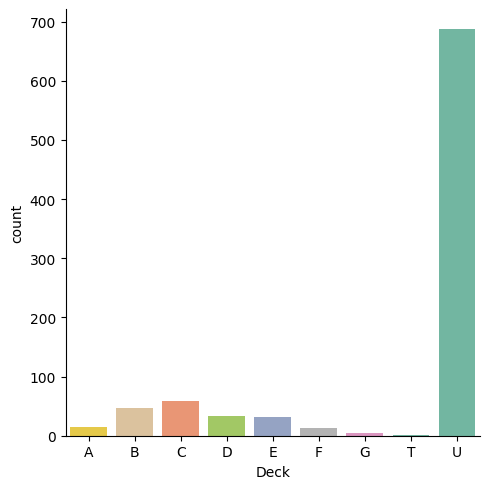

In [146]:
# Create a categorical plot of 'deck', with the x labels ordered alphabetically
sns.catplot(x='Deck', data=df_copy, kind='count', palette='Set2', hue='Deck', legend=False, order=sorted(df_copy['Deck'].unique()));

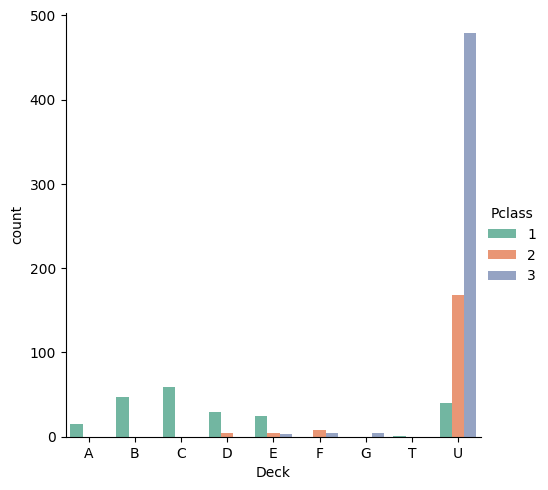

In [147]:
sns.catplot(x='Deck',data=df_copy,hue='Pclass',kind='count',palette='Set2',order=sorted(df_copy['Deck'].unique()))


#### Title

We will extract passenger titles from the Name column. The titles can give information about the social status and gender of the passengers.

In [106]:
def create_title_column(df, col):
    df['Title'] = df[col].map(lambda name:name.split('.')[0].split(',')[-1].strip())
    return df.head()

create_title_column(df=df_copy, col='Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U,Mr


In [107]:
fig = px.histogram(df_copy, x='Title', color='Survived', color_discrete_sequence=['pink', 'lightgreen'])
fig.for_each_trace(lambda trace: trace.update(name = 'Survived' if trace.name == '1' else 'Not Survived'))

fig.show()

Titles provide information about the passengers' social standing and can reflect cultural norms of the time. For example, passengers with titles like "Mrs." and "Miss." were more likely to survive compared to those with the title "Mr." This may reflect the "women and children first" policy during the evacuation.

In [108]:
create_title_column(df=df_copy, col='Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U,Mr


#### FamilySize

We will create a new variable FamilySize which will be the sum of SibSp (Number of Siblings/Children on Board) and Parch (Number of Parents/Children on Board) plus 1 (to include the passenger himself).

In [109]:
df_copy['FamilySize'] = df_copy['SibSp'] + df_copy['Parch']
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U,Mr,0


In [110]:
# Plotting the family size

fig = px.histogram(df_copy, x='FamilySize', color='Survived', color_discrete_sequence=['pink', 'lightgreen'])
fig.for_each_trace(lambda trace: trace.update(name = 'Survived' if trace.name == '1' else 'Not Survived'))

fig.show()

Smaller family groups had better survival chances, likely because they could stay together and manage the evacuation process more effectively.

#### IsAlone

We will create a binary variable IsAlone that will indicate whether a passenger was alone or not.

In [111]:
df_copy['IsAlone'] = np.where(df_copy['FamilySize'] != 1, 1, 0)
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U,Mr,0,1


In [112]:
# Plotting the IsAlone variable

fig = px.histogram(df_copy, x='IsAlone', color='Survived', color_discrete_sequence=['pink', 'lightgreen'])
fig.for_each_trace(lambda trace: trace.update(name = 'Survived' if trace.name == '1' else 'Not Survived'))
fig.update_xaxes(tickvals=[0, 1], ticktext=['Not Alone', 'Alone'])

fig.show()


#### TicketPrefix

We will extract the prefix from the Ticket column to create a new TicketPrefix variable.

In [113]:
df_copy['TicketPrefix'] = df_copy['Ticket'].str.extract('([A-Za-z]+)')
df_copy['TicketPrefix'] = df_copy['TicketPrefix'].fillna('NoPre')
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,FamilySize,IsAlone,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U,Mr,1,0,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,1,0,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U,Miss,0,1,STON
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,1,0,NoPre
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U,Mr,0,1,NoPre


In [114]:
# Plotting the TicketPrefix variable

fig = px.histogram(df_copy, x='TicketPrefix', color='Survived', color_discrete_sequence=['pink', 'lightgreen'])
fig.for_each_trace(lambda trace: trace.update(name = 'Survived' if trace.name == '1' else 'Not Survived'))

fig.show()

#### Person

It's prudent to categorize the passengers into three groups: male, female, and children.

In [123]:
# A function to determine whether an individual is male, female, or a child.

def man_woman_child(passenger):
    age=passenger['Age']
    sex=passenger['Sex']
    
    return 'child' if age < 16 else sex

# Utilizing Pandas' apply function to generate a fresh column named "Person".

df_copy['Person'] = df_copy.apply(man_woman_child,axis=1)

In [124]:
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,FamilySize,IsAlone,TicketPrefix,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U,Mr,1,0,A,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,1,0,PC,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U,Miss,0,1,STON,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,1,0,NoPre,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U,Mr,0,1,NoPre,male


In [125]:
# Getting the actual counts

print(df_copy['Person'].value_counts())

Person
male      537
female    271
child      83
Name: count, dtype: int64


In [161]:
fig = px.histogram(df_copy, x='Person', color='Survived', color_discrete_sequence=['pink', 'lightgreen'])
fig.for_each_trace(lambda trace: trace.update(name = 'Survived' if trace.name == '1' else 'Not Survived'))
fig.show()

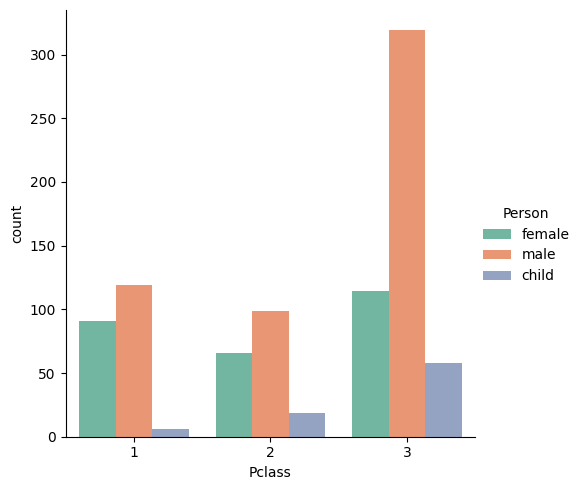

In [134]:
fig = sns.catplot(x='Pclass', data=df_copy, hue='Person', kind='count', palette='Set2')

plt.show();

It's noteworthy that there are significantly more male passengers than females or children in the third class compared to any other class. This observation will be pivotal for our subsequent analysis.



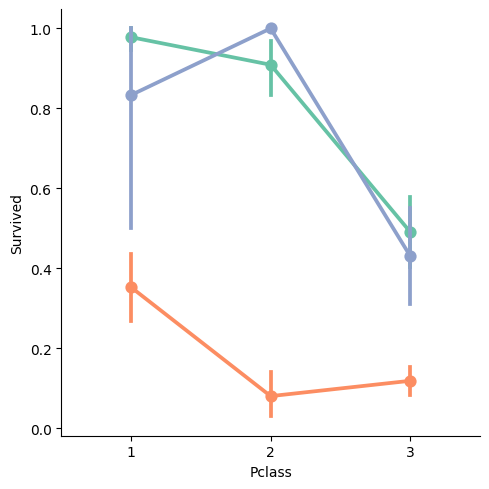

In [156]:
sns.catplot(x='Pclass', y='Survived', hue='Person', data=df_copy, kind='point', palette='Set2', legend=False)


Indeed, the factor plot confirms our suspicion that men had lower chances of survival compared to women and children, likely due to their lower priority in being saved.

Moreover, it's evident that passengers belonging to the third class generally had a lower chance of survival compared to those in the first class, regardless of gender or age.

## Summary

The analysis reveals several key factors influencing survival on the Titanic: class, sex, age, fare, and port of embarkation. First-class passengers, females, children, and those who paid higher fares had higher survival rates. These findings can be attributed to socio-economic advantages and the "women and children first" evacuation protocol. Understanding these factors provides a deeper insight into the tragic event and highlights the socio-economic disparities that influenced survival outcomes.